In [1]:
import os
import numpy as np
import pandas as pd
import pywt
import matplotlib.pyplot as plt

In [2]:
kingfa_datasets_path = "./kingfadatasets/"

In [3]:
def wpt1D(data, wavelet='db1', mode='symmetric', maxlevel=4):
    wp = pywt.WaveletPacket(data=data[1750:2261], wavelet=wavelet, mode=mode, maxlevel=maxlevel)
    paths = [node.path for node in wp.get_level(4)]  # 列出所有树节点路径
    df_wpt = pd.DataFrame()  # 合并所有四级子节点
    for a in paths:
        df_wpt[a] = wp[a].data
    return df_wpt.values

In [4]:
X = np.array(pd.read_csv(kingfa_datasets_path+"data.csv", index_col=0))

In [5]:
X = np.apply_along_axis(wpt1D, 1, X)

In [129]:
y = np.array(pd.read_csv(kingfa_datasets_path+"target.csv", index_col=0))

In [130]:
print(X.shape)
print(y.shape)

(3000, 32, 16)
(3000, 1)


In [131]:
import keras
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten, Dropout

In [132]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=1024)

In [133]:
X_train = X_train.reshape(-1, 32, 16, 1)
X_test = X_test.reshape(-1, 32, 16, 1)
y_train = keras.utils.to_categorical(y_train, 3)
y_test = keras.utils.to_categorical(y_test, 3)

In [134]:
print(X_train.shape)
print(y_train.shape)

(2550, 32, 16, 1)
(2550, 3)


In [135]:
model = Sequential()

In [136]:
model.add(Conv2D(filters=16, activation='sigmoid', kernel_size=(7, 5), input_shape=(32, 16, 1)))
model.add(MaxPooling2D(pool_size=(2,2), padding='same'))

In [137]:
model.add(Conv2D(filters=32, activation='sigmoid',kernel_size=(5, 3), padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

In [138]:
model.add(Flatten())
model.add(Dense(128))
# model.add(Activation('sigmoid'))
# model.add(Dropout(0.5))
model.add(Dense(3))
model.add(Activation('softmax'))

In [139]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 26, 12, 16)        576       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 13, 6, 16)         0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 13, 6, 32)         7712      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 7, 3, 32)          0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 672)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 128)               86144     
_________________________________________________________________
dense_13 (Dense)             (None, 3)                 387       
__________

In [140]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [141]:
history = model.fit(X_train, y_train, batch_size=32, epochs=300)

Epoch 1/300
2550/2550 [==============================] - 1s 455us/step - loss: 1.5636 - acc: 0.4694
Epoch 2/300
2550/2550 [==============================] - 1s 316us/step - loss: 0.5418 - acc: 0.6953
Epoch 3/300
2550/2550 [==============================] - 1s 316us/step - loss: 0.4307 - acc: 0.7659
Epoch 4/300
2550/2550 [==============================] - 1s 319us/step - loss: 0.3548 - acc: 0.8141
Epoch 5/300
2550/2550 [==============================] - 1s 327us/step - loss: 0.2877 - acc: 0.8533
Epoch 6/300
2550/2550 [==============================] - 1s 324us/step - loss: 0.2538 - acc: 0.8694
Epoch 7/300
2550/2550 [==============================] - 1s 317us/step - loss: 0.2222 - acc: 0.8976
Epoch 8/300
2550/2550 [==============================] - 1s 316us/step - loss: 0.1936 - acc: 0.9078
Epoch 9/300
2550/2550 [==============================] - 1s 316us/step - loss: 0.1803 - acc: 0.9137
Epoch 10/300
2550/2550 [==============================] - 1s 320us/step - loss: 0.1595 - acc: 0.9255

2550/2550 [==============================] - 1s 336us/step - loss: 0.0063 - acc: 0.9984
Epoch 83/300
2550/2550 [==============================] - 1s 355us/step - loss: 0.0114 - acc: 0.9957
Epoch 84/300
2550/2550 [==============================] - 1s 320us/step - loss: 0.0170 - acc: 0.9965
Epoch 85/300
2550/2550 [==============================] - 1s 371us/step - loss: 0.0043 - acc: 0.9992
Epoch 86/300
2550/2550 [==============================] - 1s 358us/step - loss: 0.0067 - acc: 0.9984
Epoch 87/300
2550/2550 [==============================] - 1s 335us/step - loss: 0.0024 - acc: 0.9988
Epoch 88/300
2550/2550 [==============================] - 1s 344us/step - loss: 0.0118 - acc: 0.9973
Epoch 89/300
2550/2550 [==============================] - 1s 336us/step - loss: 0.0139 - acc: 0.9965
Epoch 90/300
2550/2550 [==============================] - 1s 327us/step - loss: 0.0029 - acc: 0.9992
Epoch 91/300
2550/2550 [==============================] - 1s 332us/step - loss: 0.0079 - acc: 0.9976
Epo

Epoch 162/300
2550/2550 [==============================] - 1s 318us/step - loss: 0.0066 - acc: 0.9980
Epoch 163/300
2550/2550 [==============================] - 1s 308us/step - loss: 6.2337e-04 - acc: 0.9992
Epoch 164/300
2550/2550 [==============================] - 1s 313us/step - loss: 6.2978e-05 - acc: 1.0000
Epoch 165/300
2550/2550 [==============================] - 1s 311us/step - loss: 0.0041 - acc: 0.9988
Epoch 166/300
2550/2550 [==============================] - 1s 310us/step - loss: 0.0041 - acc: 0.9980
Epoch 167/300
2550/2550 [==============================] - 1s 309us/step - loss: 9.8874e-07 - acc: 1.0000
Epoch 168/300
2550/2550 [==============================] - 1s 310us/step - loss: 0.0067 - acc: 0.9988
Epoch 169/300
2550/2550 [==============================] - 1s 310us/step - loss: 1.6946e-05 - acc: 1.0000
Epoch 170/300
2550/2550 [==============================] - 1s 314us/step - loss: 0.0013 - acc: 0.9996
Epoch 171/300
2550/2550 [==============================] - 1s 311u

2550/2550 [==============================] - 1s 311us/step - loss: 0.0036 - acc: 0.9988
Epoch 241/300
2550/2550 [==============================] - 1s 316us/step - loss: 8.1773e-07 - acc: 1.0000
Epoch 242/300
2550/2550 [==============================] - 1s 316us/step - loss: 0.0015 - acc: 0.9996
Epoch 243/300
2550/2550 [==============================] - 1s 319us/step - loss: 9.9000e-07 - acc: 1.0000
Epoch 244/300
2550/2550 [==============================] - 1s 311us/step - loss: 1.7309e-07 - acc: 1.0000
Epoch 245/300
2550/2550 [==============================] - 1s 315us/step - loss: 5.8232e-04 - acc: 0.9996
Epoch 246/300
2550/2550 [==============================] - 1s 314us/step - loss: 4.6786e-05 - acc: 1.0000
Epoch 247/300
2550/2550 [==============================] - 1s 313us/step - loss: 0.0063 - acc: 0.9984
Epoch 248/300
2550/2550 [==============================] - 1s 329us/step - loss: 1.1507e-06 - acc: 1.0000
Epoch 249/300
2550/2550 [==============================] - 1s 375us/step

In [142]:
score = model.evaluate(X_test, y_test)
print("LOSS:", score[0])
print("Accuracy:", score[1])

450/450 [==============================] - 0s 360us/step
LOSS: 0.034514058981464285
Accuracy: 0.9933333333333333


In [143]:
predict = model.predict(X_test)

In [144]:
np.argmax(predict, axis=1)

array([0, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 0, 1, 1, 0, 2, 2, 1, 0, 0, 1, 2,
       2, 2, 1, 2, 2, 2, 0, 2, 1, 2, 1, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2,
       2, 0, 0, 0, 1, 2, 2, 2, 2, 0, 2, 1, 0, 1, 0, 0, 2, 1, 0, 2, 1, 1,
       2, 1, 2, 2, 1, 0, 2, 2, 0, 1, 0, 0, 2, 2, 1, 1, 0, 2, 2, 0, 1, 1,
       1, 1, 1, 0, 2, 0, 0, 0, 1, 2, 2, 0, 0, 0, 2, 1, 1, 1, 1, 2, 0, 1,
       2, 0, 0, 0, 0, 1, 2, 0, 0, 0, 1, 1, 2, 0, 0, 2, 2, 2, 2, 0, 0, 2,
       2, 2, 1, 2, 0, 0, 0, 2, 0, 0, 0, 2, 2, 2, 2, 1, 1, 1, 0, 0, 0, 2,
       1, 0, 2, 1, 1, 2, 2, 0, 1, 0, 1, 1, 1, 1, 2, 2, 2, 0, 0, 0, 0, 1,
       0, 0, 1, 2, 2, 1, 2, 1, 2, 0, 0, 0, 1, 1, 1, 0, 2, 1, 2, 1, 2, 2,
       2, 1, 0, 0, 0, 2, 0, 1, 2, 2, 1, 1, 0, 2, 1, 1, 2, 0, 1, 2, 2, 1,
       0, 2, 0, 2, 2, 2, 2, 1, 1, 1, 2, 1, 0, 2, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 2, 2, 0, 1, 0, 1, 2, 1, 0, 1, 2, 2, 2, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 2, 1, 0, 1, 1, 2, 2, 1, 1, 0, 1, 0, 2, 2, 2, 0, 0,
       2, 2, 2, 2, 0, 1, 0, 1, 2, 1, 2, 2, 1, 1, 0,

In [145]:
np.where(np.argmax(predict, axis=1) != np.argmax(y_test, axis=1))

(array([ 28,  87, 184], dtype=int64),)

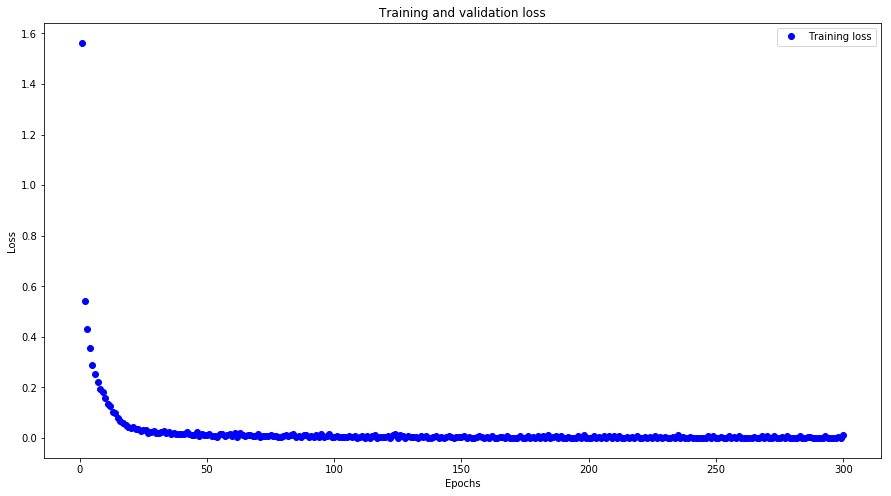

In [147]:
loss = history.history['loss']
# val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.figure(figsize=(15,8))
plt.plot(epochs, loss, 'bo', label='Training loss')
# plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

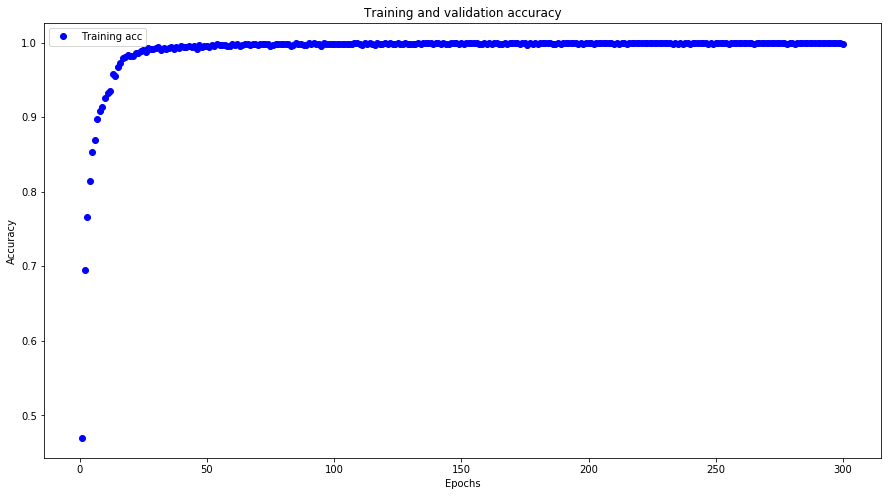

In [148]:
acc = history.history['acc']
# val_acc = history.history['val_acc']
plt.figure(figsize=(15,8))
plt.plot(epochs, acc, 'bo', label='Training acc')
# plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()